<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px">
# Classification Evaluation Lab
Week 4 | Lab 1.4
***

The goal of our first classifcation evaluation lab is to understand working with the common tools and methods we use when we evaluate prediction in terms of classification.  Also, we will explore the possibility of engineering features with continious variables, that can be used for classifcation.

In [236]:
import pandas as pd, numpy as np, seaborn as sns

%matplotlib inline

## Load the "Sacramento Realestate Transactions" housing dataset

In [237]:
df = pd.read_csv("../../../datasets/sacramento_real_estate/Sacramentorealestatetransactions.csv")


### 1. Create a binary variable where 1 indicates a house sold for over 200,000 and 0 indicates a house sold for equal to or less than 200,000.

In [238]:
df['over_200'] = df['price'].map(lambda price: 1 if price > 200000 else 0)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,over_200
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0


### 2. Subset the data to just contain the number of beds, baths, the sq ft, and the over 200k indicator / response variable.

Use patsy for this please!

In [239]:
df.columns

Index([u'street', u'city', u'zip', u'state', u'beds', u'baths', u'sq__ft',
       u'type', u'sale_date', u'price', u'latitude', u'longitude',
       u'over_200'],
      dtype='object')

In [240]:
import patsy

y, X = patsy.dmatrices("over_200 ~ beds + baths + sq__ft - 1", data=df, return_type="dataframe")


### 3. Load your design matrix.  Split your data into training and testing sets.  Setup KNN.

The predictors are the beds, baths, and sq ft. The feature is the over 200k class variable you just created. Make the test size 33% (and optionally stratify).

> _Research the stratify parameter.  Why could this be important?_

In [241]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=.33)

knn       =   KNeighborsClassifier()
model     =   knn.fit(X_train, y_train)

predicted =   knn.predict(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((659, 3), (326, 3), (659,), (326,))

### 4. Print out the confusion matrix
What do these mean?

In [242]:
# [[true positive, false negative],
#  [false positive, true negative]]

print confusion_matrix(y_test, predicted)

[[104  38]
 [ 68 116]]


### 5. Change the response threshold (price) for your target.

Currently, you should be encoding a binary price variable based on prices > 200.  How does adjusting that threashold affect the false positive rate of your prediction?  Print out your confusion matrix.

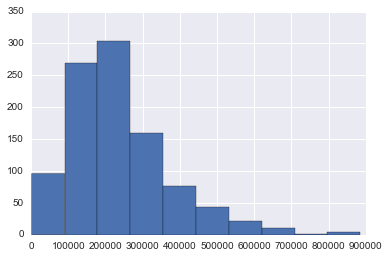

In [243]:
df['price'].hist()
df['over_200'] = df['price'].map(lambda price: 1 if price > 90000 else 0)

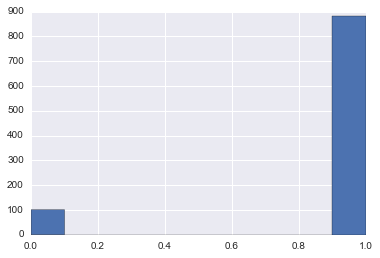

In [244]:
df['over_200'].hist()

In [245]:
df['over_200'] = df['price'].map(lambda price: 1 if price > 200000 else 0)

y, X = patsy.dmatrices("over_200 ~ beds + baths + sq__ft - 1", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=.33)

knn       =   KNeighborsClassifier()
model     =   knn.fit(X_train, y_train)

predicted =   knn.predict(X_test)

true_pos, false_neg, false_pos, true_neg  = np.ravel(confusion_matrix(y_test, predicted))


### 6. Plot your confusion matrix metrics through a range of K from 1-10.
Iterate through a list of numbers containing a range of N from 1-10.  Plot your false positive rate.

> **Optionally** Plot the scores from the rest of the confusion matrix and plot their values, _true_positives, false_negatives, false_positives, true_negatives_, over this range for **K** (n_neighbors).

How do they change?  Why do they change?

In [246]:
my_matrix = [[1,3,4]]
# pd.DataFrame(my_matrix)


np.ravel(my_matrix)

array([1, 3, 4])

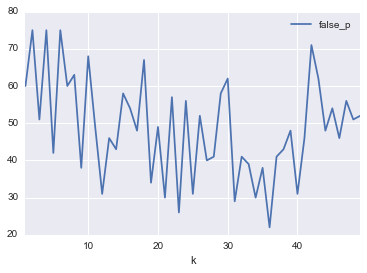

In [247]:
scores = []

for k in range(1, 50):
    y, X = patsy.dmatrices("over_200 ~ beds + baths + sq__ft - 1", data=df, return_type="dataframe")

    X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=.33)

    knn       =   KNeighborsClassifier(n_neighbors = k)
    model     =   knn.fit(X_train, y_train)

    predicted =   knn.predict(X_test)
    knn_score =   knn.score(X_test, y_test)
    
    tp, fn, fp, tn = np.ravel(confusion_matrix(y_test, predicted))

    scores.append({
        "true_p":   tp,
        "false_n":  fn,
        "false_p":  fp,
        "true_n":   tn,
        "model_score": knn_score,
        "k":        k
    })

scores_df = pd.DataFrame(scores)
# scores_df.index = scores_df['k']
scores_df.plot(kind="line", x="k", y="false_p")

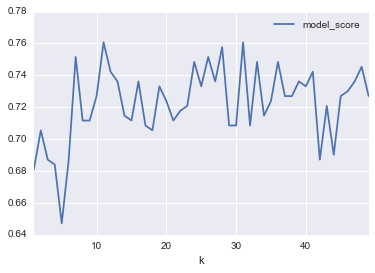

In [248]:
scores_df.plot(kind="line", x="k", y="model_score")

In [249]:
data = load_iris()
data.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

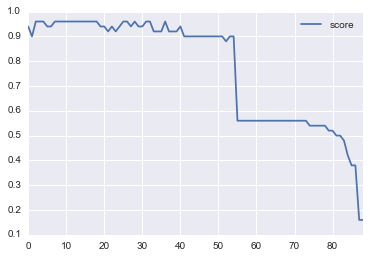

In [250]:
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
# df.plot(kind="scatter", y="petal length (cm)", x="petal width (cm)")

X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size=.33)


scores = []

for k in range(1, 90):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    scores.append({
        "score": knn.score(X_test, y_test)      
    })
    
score_df = pd.DataFrame(scores)
score_df.plot()


In [251]:

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)

test_data = pd.DataFrame(X_test, columns=df.columns)
test_data['predicted'] = predicted

def get_label(target):
    return data.target_names[target]

test_data['flower_type'] = test_data['predicted'].map(get_label)
    

In [261]:
def factor_scatter_matrix(df, factor, palette=None):
    '''Create a scatter matrix of the variables in df, with differently colored
    points depending on the value of df[factor].
    inputs:
        df: pandas.DataFrame containing the columns to be plotted, as well 
            as factor.
        factor: string or pandas.Series. The column indicating which group 
            each row belongs to.
        palette: A list of hex codes, at least as long as the number of groups.
            If omitted, a predefined palette will be used, but it only includes
            9 groups.
    '''
    import matplotlib.colors
    import numpy as np
    from pandas.tools.plotting import scatter_matrix
    from scipy.stats import gaussian_kde

    if isinstance(factor, basestring):
        factor_name = factor #save off the name
        factor = df[factor] #extract column
        df = df.drop(factor_name,axis=1) # remove from df, so it 
        # doesn't get a row and col in the plot.

    classes = list(set(factor))

    if palette is None:
        palette = ['#e41a1c', '#377eb8', '#4eae4b', 
                   '#994fa1', '#ff8101', '#fdfc33', 
                   '#a8572c', '#f482be', '#999999']

    color_map = dict(zip(classes,palette))

    if len(classes) > len(palette):
        raise ValueError('''Too many groups for the number of colors provided.
We only have {} colors in the palette, but you have {}
groups.'''.format(len(palette), len(classes)))

    colors = factor.apply(lambda group: color_map[group])
    axarr = scatter_matrix(df,figsize=(10,10),marker='o',c=colors,diagonal=None)


    for rc in xrange(len(df.columns)):
        for group in classes:
            y = df[factor == group].icol(rc).values
            gkde = gaussian_kde(y)
            ind = np.linspace(y.min(), y.max(), 1000)
            axarr[rc][rc].plot(ind, gkde.evaluate(ind),c=color_map[group])

    return axarr, color_map

/Users/davidyerrington/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:44: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]


(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a481250>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x12d2ff810>]], dtype=object),
 {'setosa': '#4eae4b', 'versicolor': '#377eb8', 'virginica': '#e41a1c'})

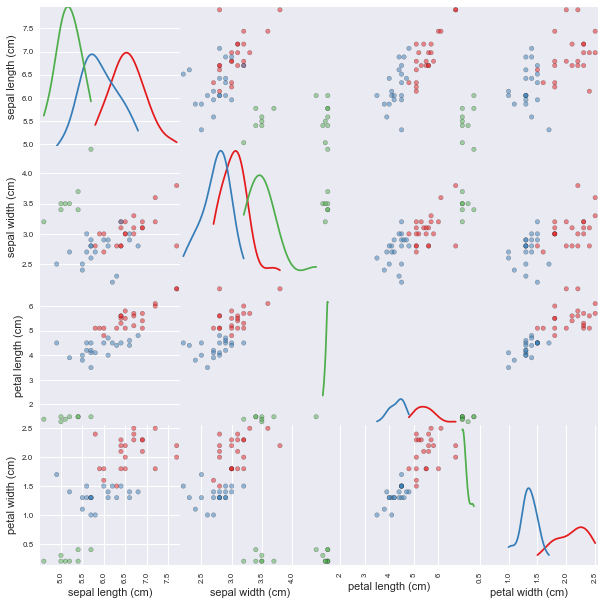

In [262]:
factor_scatter_matrix(test_data[test_data.columns[:4]], test_data['flower_type'] )

### 7.  Can you think on any reasons changing this threashold is bad / good?

Find someone you've not talked with much in class then discuss this with them.  Seriously, get out and talk to someone you haven't talked with much.

_**Because the classes that created (0 and 1), will change how they are balanced.  Your baseline will change the more you change your threashold.  The accuracy of your predictions will also be impacted because if you have few samples to train on for a given class, your ability to generalize predictions (signal) for that class will be diminished.**_

### 8. If you were a real-estate agent, and you wanted to minimize false positives, because you would lose money, what would you be trading off in terms of business value?

Discuss this with a few others as well and come up with at least 2 ideas that are actionable and optionally explore one of them through further analysis.

_Your ability to generalize true positives could be impacted.  When you have more than 2 classes, it could be more difficult to understand the tradeoffs between classes given the accuracy and bias in your model.  You could determine how well you can predict wether or not a property could be sold at the given point (the class: 1), but you would miss out on opportunities that wouldn't have as strong of likelihood of being sold that you are cutting out._

_One of the ways you could mitigate some of the loss of qualifying on high predictions to reduce false positives, would be to continue to collect data, and decide how much financial risk is worth allowing lower scoring predictions to make it into your pipeline for selection.  With .75 accuracy, you're going to lose a bit anyway.  How much are you really hedging as a business with that level of financial certainy?  You could hold out a set of data outside of train / test to see how feasable your threashold is and also simulate profit gains of %10 and use that as a model for your financial loss to get a ballpark of potential._

### Challenge #1:  Gridsearch + plot for an optimal value for K with KNN
Plot the value of K from Gridsearch params scored over the range to find an optimal value for K, for score.

> **Optionally**, can you find a configuration that minimizes false positives?  What is the tradeoff if so?

### Challenge #2:  Gridsearch optimal parameters for score for KNN
Can you find optimal parameters for KNN?  K will have the biggest impact, but you might be able to sqeeze a little bit more out using the other parameters.

### Challenge #3: Plot TP, FP, TN, FN in a single plot over a range of K

Manually plot a figure with 4 sub plots, 2x2, which plots the the range of K, by these 4 metrics.  Iterate through a range of K, from 1, 50 by steps of 2, fitting and scoring your classification through confusion matrix.

ASCII prototype:

```
|----------------- figure 1 -------------------|
|                      |                       |
|  [TP line plot #1]   |   [FP line graph #1]  |
|                      |                       |
|----------------------|-----------------------|
|                      |                       |
|  [TN line plot #1]   |   [FN line graph #1]  |
|                      |                       |
------------------------------------------------

```